In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Dataset-Unicauca-Version2-87Atts.csv')
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [3]:
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

#Preprocessing

Removing unnecessary columns

L7protocol and protocol name are mapped with each other as protocol name is categorical and L7protocol is already in numerical we remove protocol feature.

All the features having constant value over the dataset are removed. Below is list of features:

Label,Bwd.Avg.Bulk.Rate,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Fwd.Avg.Bytes.Bulk,CWE.Flag.Count,Bwd.URG.Flags,Fwd.URG.Flags,Bwd.PSH.Flags,Label

In [4]:
# removing extra columns that are not useful for finding correlation
# axis = 1 because we need to drop the columns
# by default axis = 0 (drop the rows)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc=StandardScaler()
dataset = df.drop(['Flow.ID','Source.IP','Label', 'Timestamp','Destination.IP', 'Source.Port', 'Destination.Port', 'Protocol'], axis=1)

x_dataset = dataset.drop(['ProtocolName'], axis = 1)
y_dataset = dataset['ProtocolName']

# normal dataset
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
df.drop(columns=['Bwd.Avg.Bulk.Rate','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bytes.Bulk','Fwd.Avg.Packets.Bulk','Fwd.Avg.Bulk.Rate','Fwd.Avg.Bytes.Bulk','CWE.Flag.Count','Bwd.URG.Flags','Fwd.URG.Flags','Bwd.PSH.Flags','Label'], inplace=True)

In [6]:
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s',
       'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length',
       'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance',
      

Removing unwanted columns:

In [7]:
df.drop(columns=['ECE.Flag.Count','URG.Flag.Count','ACK.Flag.Count','PSH.Flag.Count','RST.Flag.Count','SYN.Flag.Count','FIN.Flag.Count','Fwd.PSH.Flags','Flow.ID'], inplace=True)

In [8]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.S

In [9]:
null_counts = df.isnull().sum()
features_with_nulls = null_counts[null_counts > 0]

for feature, null_count in features_with_nulls.items():
    print("Feature '{feature}' has {null_count} null values.")

From above we can see that there are no null values in any feature in dataset.

In [10]:
df.shape

(3577296, 67)

<AxesSubplot: >

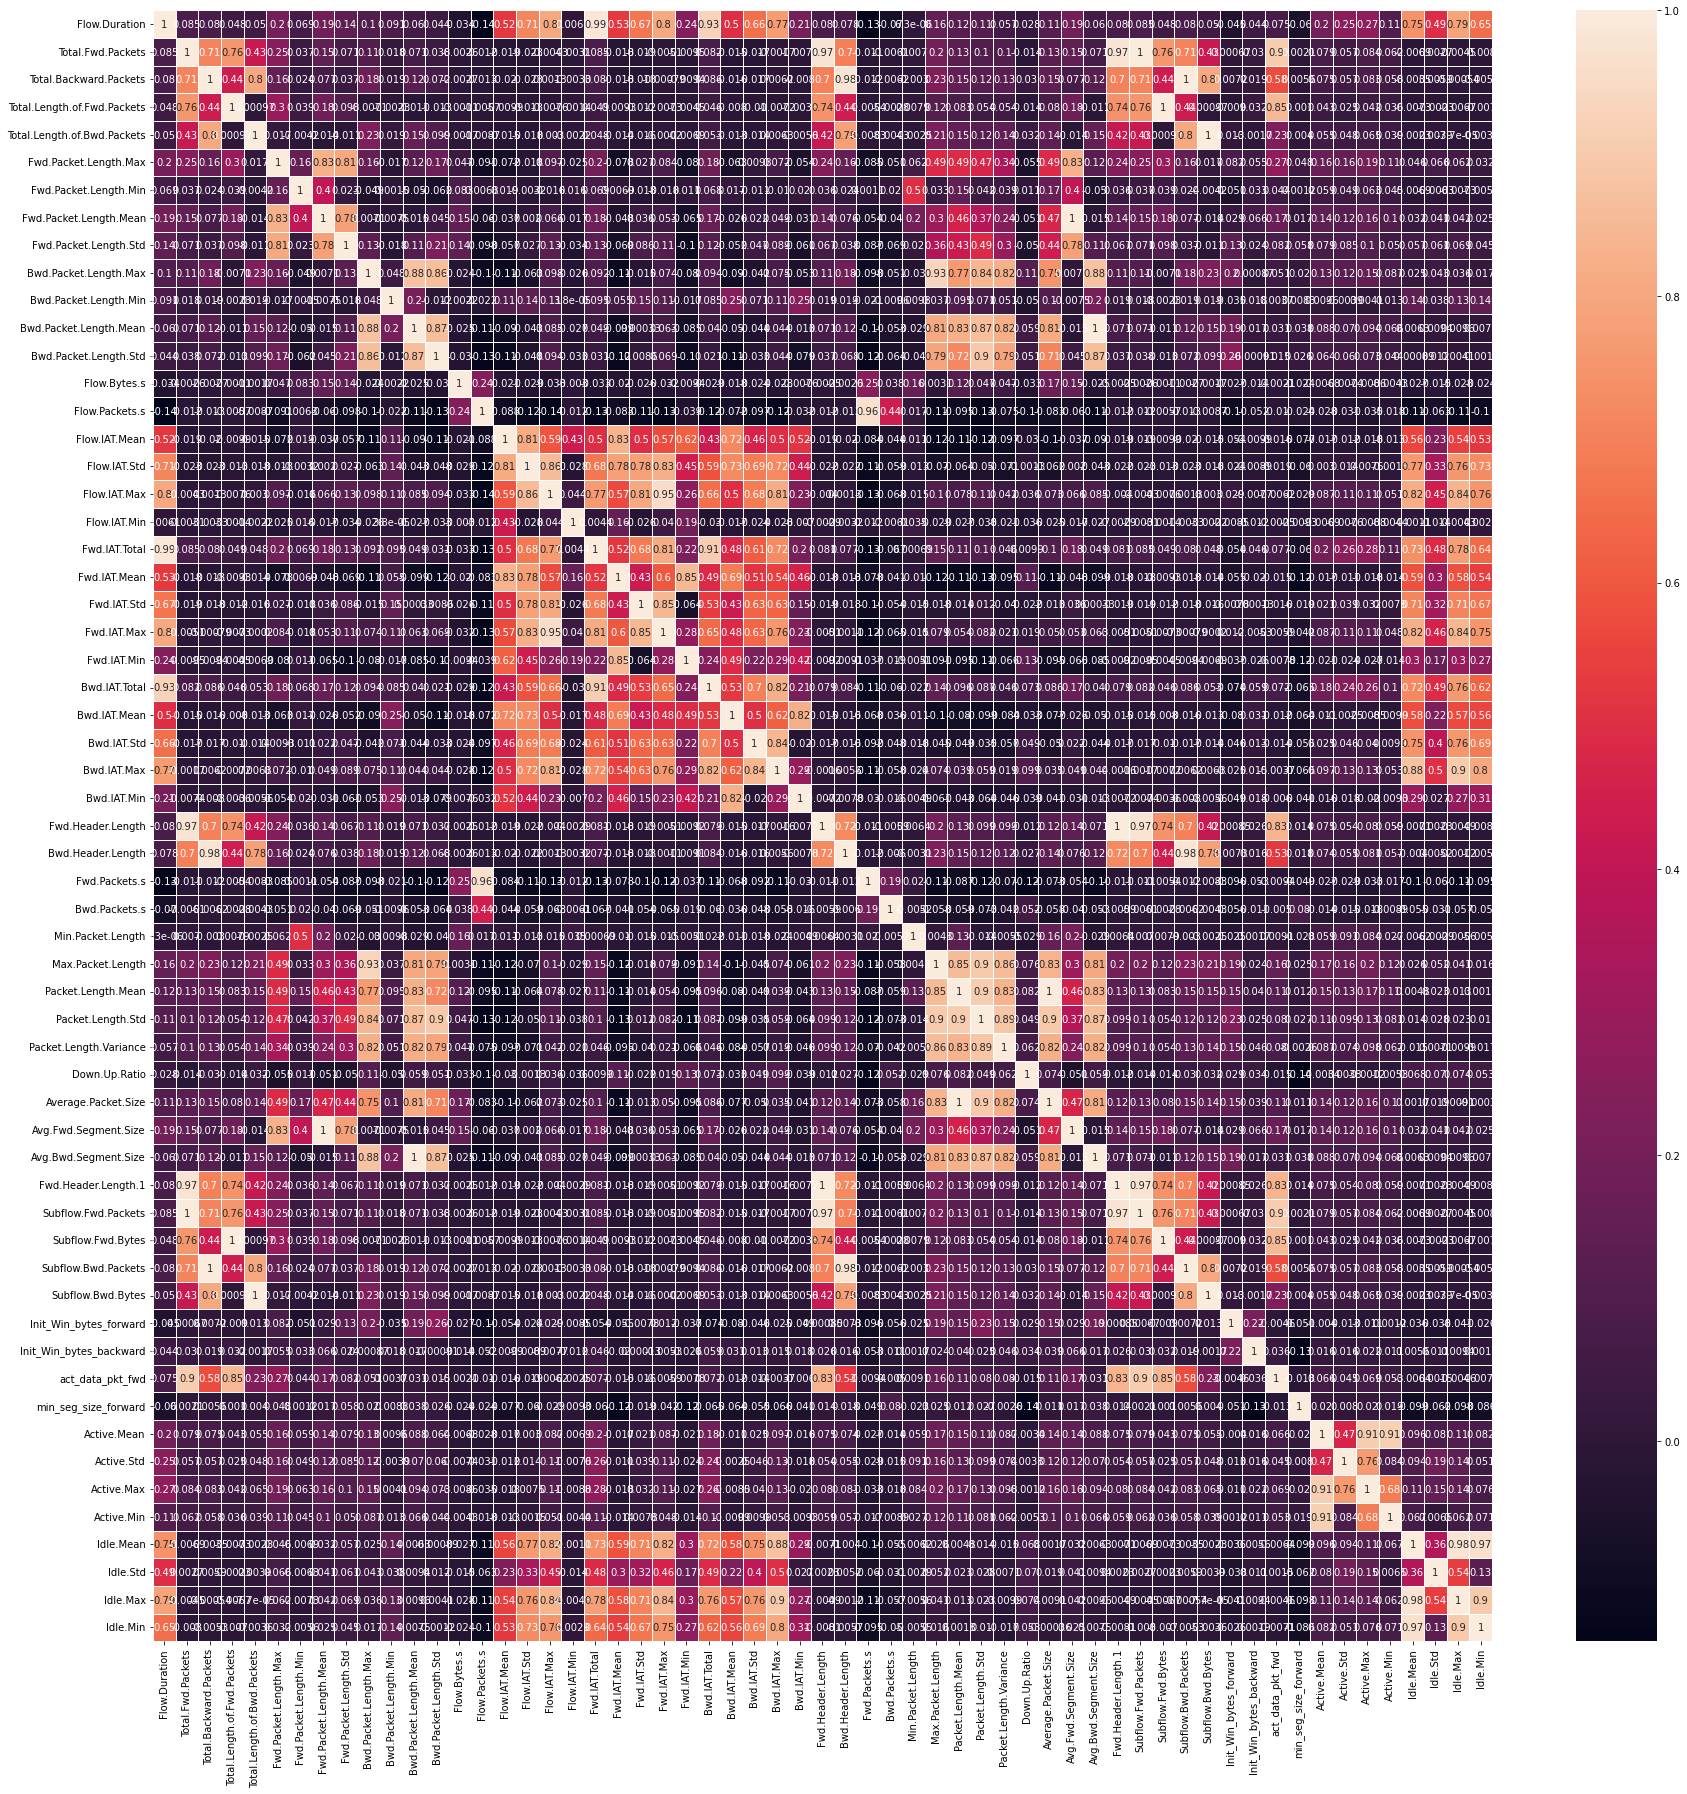

In [11]:
new_df = df[['Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.Size',
       'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1',
       'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets',
       'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min']]
plt.figure(figsize=(30,30))
sns.heatmap(data=new_df.corr(), lw = 1,annot=True)

1) Total.Fwd.Packets is highly corelated with Total.Backward.Packets,Total.Length.Fwd.Packets,Fwd.Header.length.1,Subflow.Fwd.Packets,Subflow.Bwd.Packets,Bwd.Header.Length,act_data_pkt_fwd,Subflow.Fwd.Bytes,Fwd.Header.Length <br><br>
2) Flow.duration is highly corelated with  Flow.IAT.Mean, 'Flow.IAT.Std', 'Flow.IAT.Max','Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max','Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max','Idle.Mean', 'Idle.Max', 'Idle.Min,  'Idle.Std' <br><br>
3) 'Packet.Length.Mean' is highly corelated with 'Max.Packet.Length',, 'Packet.Length.Std', 'Packet.Length.Variance','Average.Packet.Size','Avg.Bwd.Segment.Size','Bwd.Packet.Length.Max','Bwd.Packet.Length.Mean','Bwd.Packet.Length.Std' <br>
4)Total .length.of.BWD.Packets is highly corelated with Subflow.Bwd.Bytes <br><br>
5) Active.mean is highly co related with  'Active.Std', 'Active.Max', 'Active.Min'. <br><br>
6) 'Flow.Packets.s' is highly co related with  'Fwd.Packets.s' <br><br>
 7) 'Min.Packet.Length' is highly corelated with 'Fwd.Packet.Length.Min' <br><br>
8) 'Fwd.Packet.Length.Mean' is highly corelated with 'Avg.Fwd.Segment.Size', 'Fwd.Packet.Length.Std','Fwd.Packet.Length.Max'

In [12]:
# df.drop(columns=['Source.IP', 'Timestamp','Destination.IP', 'Source.Port', 'Destination.Port', 'Protocol'])

In [13]:
df.drop(columns=['Fwd.Header.Length.1','Subflow.Fwd.Packets','Subflow.Bwd.Packets','Bwd.Header.Length','act_data_pkt_fwd','Subflow.Fwd.Bytes','Fwd.Header.Length'], inplace=True)

In [14]:
df.drop(columns=['Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max','Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max','Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max','Idle.Mean',
        'Idle.Max', 'Idle.Min',  'Idle.Std'], inplace=True)

'Packet.Length.Mean' is highly corelated with 'Max.Packet.Length',, 'Packet.Length.Std', 'Packet.Length.Variance','Average.Packet.Size','Avg.Bwd.Segment.Size','Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std'

In [15]:
df.drop(columns=['Max.Packet.Length', 'Packet.Length.Std', 'Packet.Length.Variance','Average.Packet.Size','Avg.Bwd.Segment.Size','Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std'], inplace=True)


In [16]:
df.drop(columns=['Active.Std', 'Active.Max', 'Active.Min', 'Fwd.Packets.s','Avg.Fwd.Segment.Size', 'Fwd.Packet.Length.Std','Fwd.Packet.Length.Max','Fwd.Packet.Length.Min'], inplace=True)

In [17]:
df.drop(columns=[ 'Subflow.Bwd.Bytes'], inplace=True)

In [18]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName'],
      dtype='object')

In [19]:
print(df.dtypes)

Source.IP                       object
Source.Port                      int64
Destination.IP                  object
Destination.Port                 int64
Protocol                         int64
Timestamp                       object
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets    float64
Fwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Min            int64
Flow.Bytes.s                   float64
Flow.Packets.s                 float64
Flow.IAT.Min                     int64
Fwd.IAT.Min                    float64
Bwd.IAT.Min                    float64
Bwd.Packets.s                  float64
Min.Packet.Length                int64
Packet.Length.Mean             float64
Down.Up.Ratio                    int64
Init_Win_bytes_forward           int64
Init_Win_bytes_backward          int64
min_seg_size_forward             int64
Active.Mean              

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['Source.IP','Destination.IP']

# Perform label encoding for the specified columns
for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])


# Perform label encoding for the specified columns
for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [21]:
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,Packet.Length.Mean,Down.Up.Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active.Mean,L7Protocol,ProtocolName,Source.IP_encoded,Destination.IP_encoded
0,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,...,1417.333333,2,256,490,20,0.0,131,HTTP_PROXY,1291,65
1,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,...,6.000000,0,490,-1,20,0.0,131,HTTP_PROXY,62,5197
2,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,...,252.750000,0,888,-1,32,0.0,7,HTTP,4697,59
3,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,...,0.000000,3,888,490,32,0.0,7,HTTP,4697,59
4,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,...,267.500000,0,253,-1,20,0.0,131,HTTP_PROXY,3181,65


#EDA

#### Boxplot

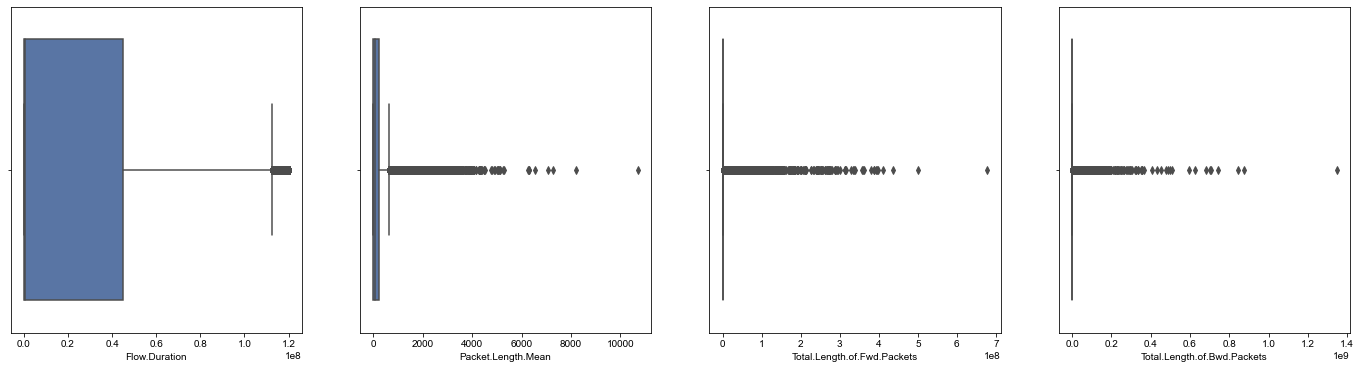

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Flow.Duration", "Packet.Length.Mean","Total.Length.of.Fwd.Packets","Total.Length.of.Bwd.Packets"]):
    sns.boxplot(x=df[col], ax=ax[axid])

Here we can see the mean values, IQR and outliers for Flow Duration, Packet Length Mean, Total.Length.of.Fwd.Packets and Total.Length.of.Bwd.Packets.

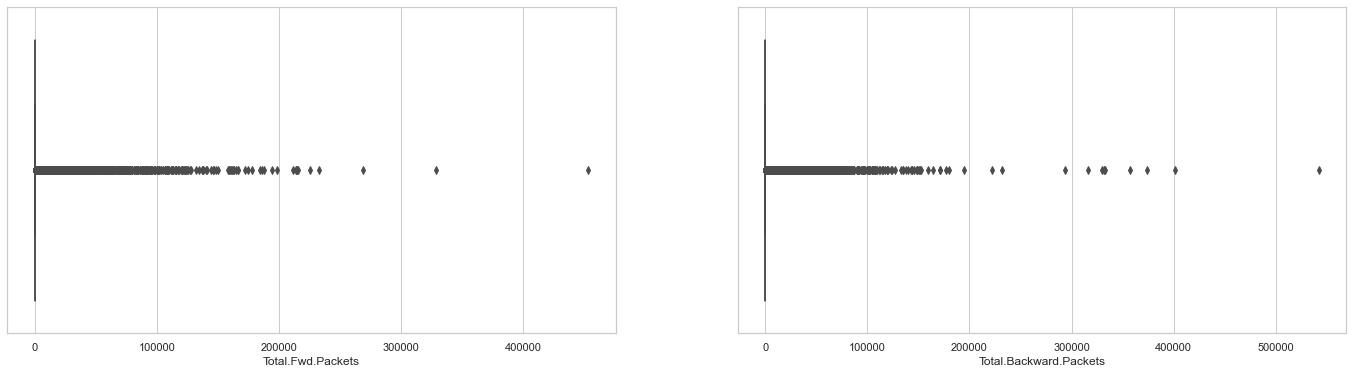

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Total.Fwd.Packets", "Total.Backward.Packets"]):
    sns.boxplot(x=df[col], ax=ax[axid])

Here we can see the mean values, IQR and outliers for Total.Fwd.Packets and Total.Backward.Packets.

In [24]:
print(df.shape)

(3577296, 30)


In [25]:
print(df.dtypes)

Source.IP                       object
Source.Port                      int64
Destination.IP                  object
Destination.Port                 int64
Protocol                         int64
Timestamp                       object
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets    float64
Fwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Min            int64
Flow.Bytes.s                   float64
Flow.Packets.s                 float64
Flow.IAT.Min                     int64
Fwd.IAT.Min                    float64
Bwd.IAT.Min                    float64
Bwd.Packets.s                  float64
Min.Packet.Length                int64
Packet.Length.Mean             float64
Down.Up.Ratio                    int64
Init_Win_bytes_forward           int64
Init_Win_bytes_backward          int64
min_seg_size_forward             int64
Active.Mean              

In [26]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName',
       'Source.IP_encoded', 'Destination.IP_encoded'],
      dtype='object')

In [27]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of columns for which you want to remove outliers
columns_to_check = [  'Source.Port', 'Destination.Port',
       'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean']  # Replace with your column names

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df, columns_to_check)

# Now, df_cleaned contains your DataFrame with outliers removed.
df_cleaned.head()
print(df_cleaned.shape)

(215608, 30)


In [28]:
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,Packet.Length.Mean,Down.Up.Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active.Mean,L7Protocol,ProtocolName,Source.IP_encoded,Destination.IP_encoded
0,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,...,1417.333333,2,256,490,20,0.0,131,HTTP_PROXY,1291,65
1,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,...,6.000000,0,490,-1,20,0.0,131,HTTP_PROXY,62,5197
2,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,...,252.750000,0,888,-1,32,0.0,7,HTTP,4697,59
3,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,...,0.000000,3,888,490,32,0.0,7,HTTP,4697,59
4,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,...,267.500000,0,253,-1,20,0.0,131,HTTP_PROXY,3181,65


###Piechart

Distribution of ProtocolName && Protocoltype

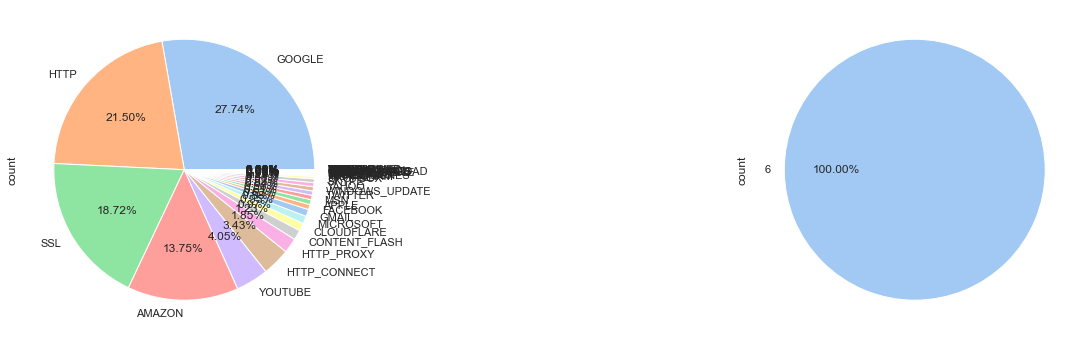

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for axid, col in enumerate(["ProtocolName","Protocol"]):
    col_dist = df_cleaned[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

Here we can see the distribution of different protocol names and also infer that there is only one protocol type 6.

Distribution of L7 Protocol Names && Down/Up Ratio

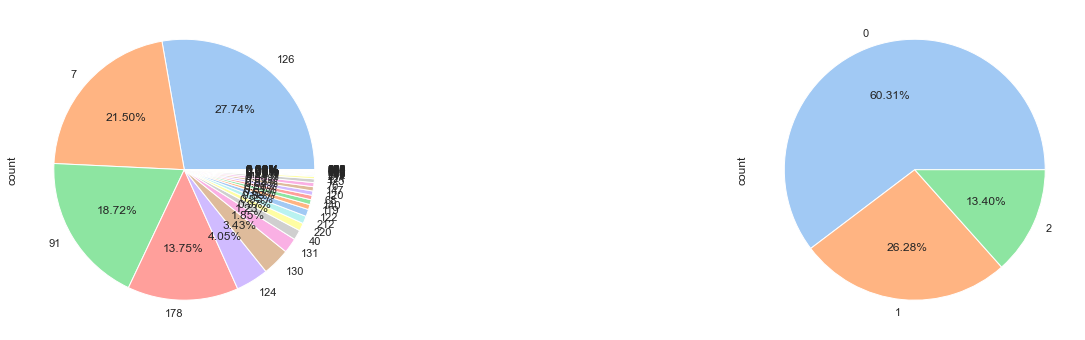

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for axid, col in enumerate(["L7Protocol","Down.Up.Ratio"]):
    col_dist = df_cleaned[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

Here we can see the distribution of L7 protocol and down up ratio.

In [31]:
df_cnt_h=df_cleaned['Flow.Duration'].value_counts()
df_cnt_h

Flow.Duration
155         414
152         405
153         395
151         384
154         380
           ... 
136044        1
588511        1
770228        1
147494        1
26981272      1
Name: count, Length: 123305, dtype: int64

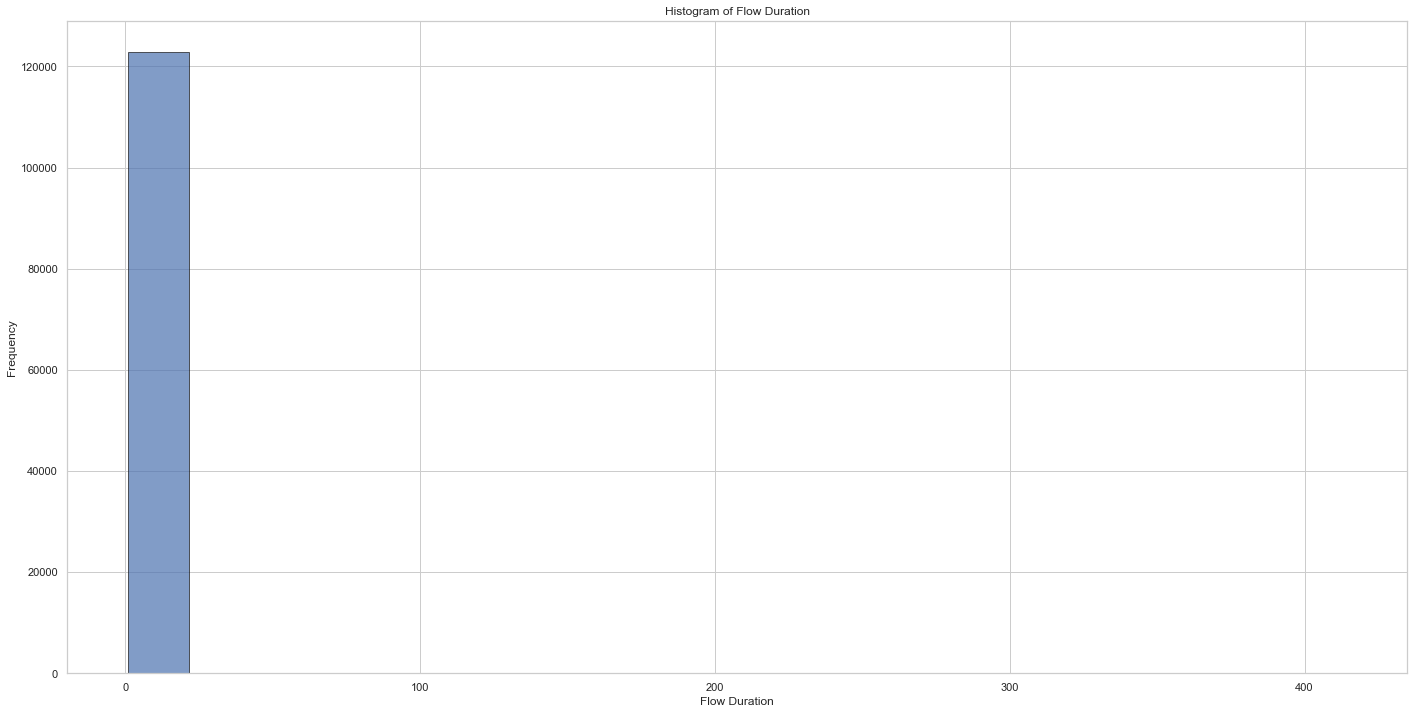

In [32]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Duration')
plt.show()

Here we can see the frequency of different flow duaration.

In [33]:
df_cnt_h=df_cleaned['Source.Port'].value_counts()
df_cnt_h

Source.Port
3128     3674
42468      34
50850      33
60196      31
54869      29
         ... 
4182        1
4180        1
4176        1
4160        1
63405       1
Name: count, Length: 31627, dtype: int64

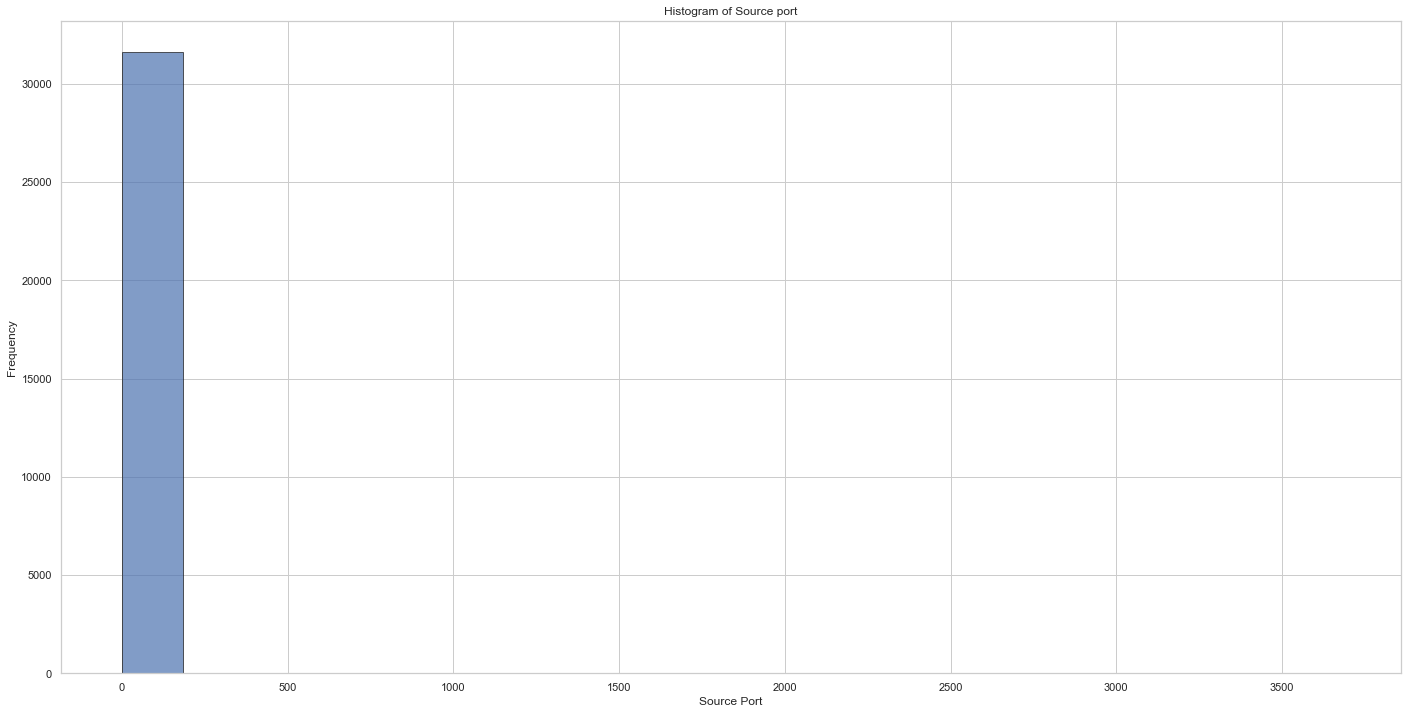

In [34]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Source Port')
plt.ylabel('Frequency')
plt.title('Histogram of Source port')
plt.show()

Here we can see the frequency of different Source Ports.

In [35]:
df_cnt_h=df_cleaned['Destination.Port'].value_counts()
df_cnt_h

Destination.Port
443     108001
80       87133
3128     15932
5228       641
5223       111
         ...  
2053         1
3013         1
2045         1
3019         1
4140         1
Name: count, Length: 2332, dtype: int64

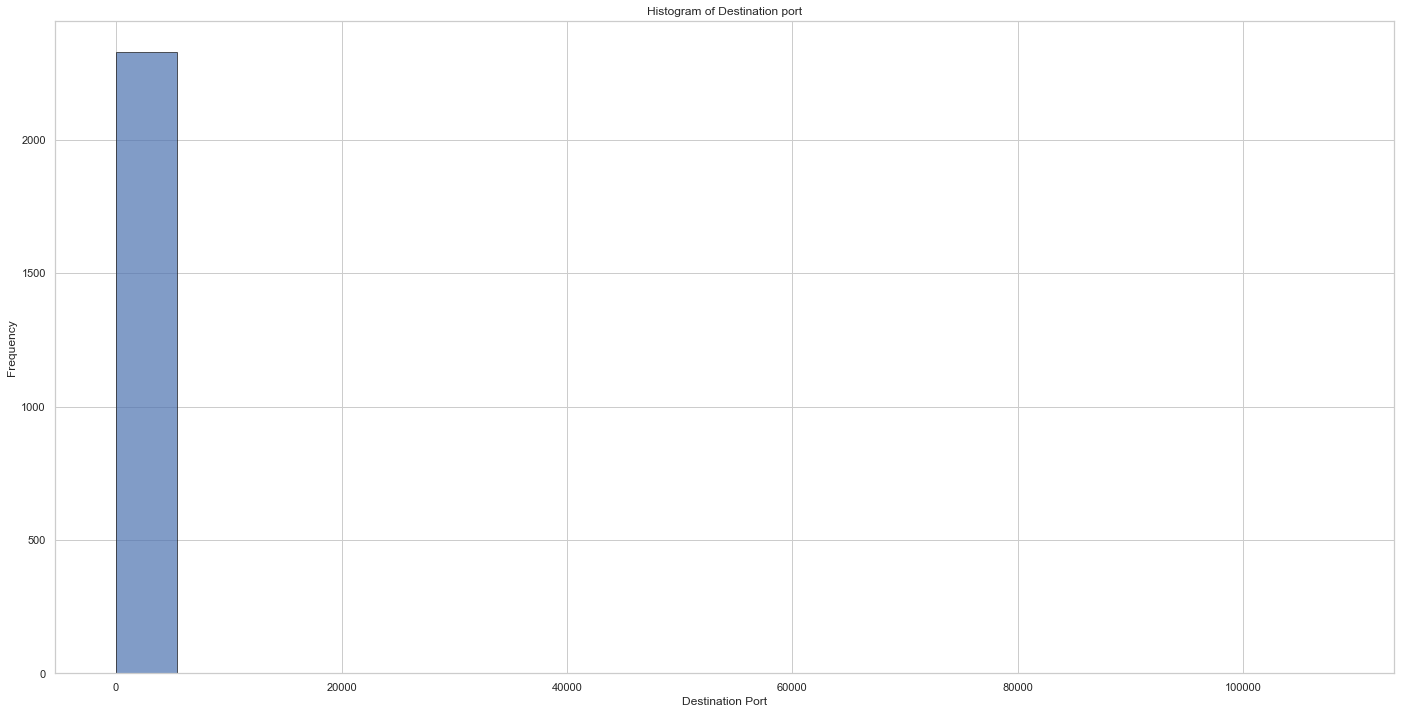

In [36]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.title('Histogram of Destination port')
plt.show()

Here we can see the frequency of different Destination Ports.

###Scatterplot

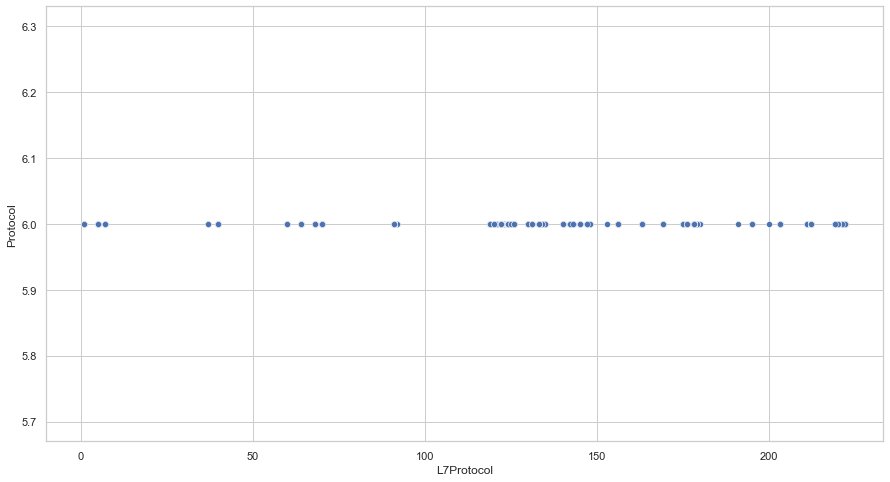

In [37]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df_cleaned["L7Protocol"], y=df_cleaned["Protocol"], sizes=(20, 200), legend="full")

Here we can see the relation between L7 Protocol and Protocol. As there is only one protocol 6 the relation is a straight line.

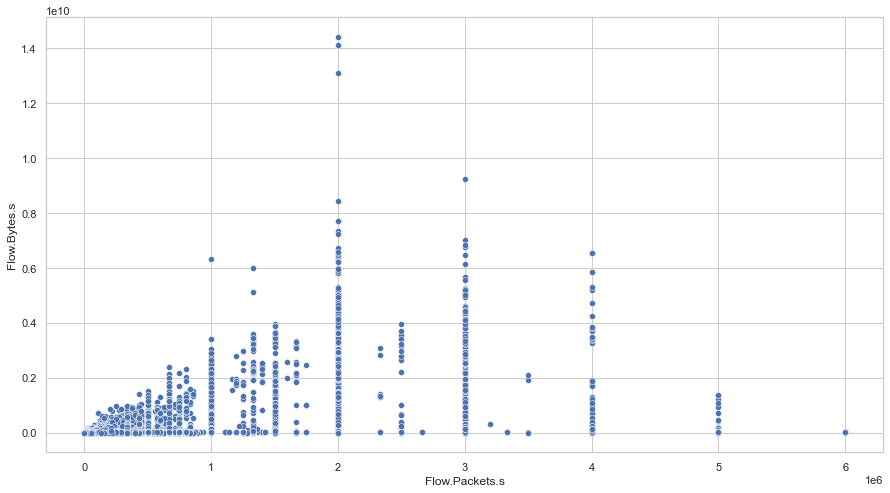

In [38]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Flow.Packets.s"], y=df["Flow.Bytes.s"], sizes=(20, 200), legend="full")

Here we can see the relation between flow packets and flow bytes.

In [39]:
df_cleaned['Timestamp1'] = pd.to_datetime(df_cleaned['Timestamp'], format='%d/%m/%Y%H:%M:%S')
df_cleaned['Hour'] = df_cleaned['Timestamp1'].dt.hour + df_cleaned['Timestamp1'].dt.minute / 60 + df_cleaned['Timestamp1'].dt.second / 3600

In [40]:
df_cleaned['Hour']

23         11.188056
152        11.188333
177        11.188056
284        11.188611
296        11.188056
             ...    
3574710     5.575278
3575671     5.571111
3575684     5.763611
3575688     5.771111
3575762     5.569444
Name: Hour, Length: 215608, dtype: float64

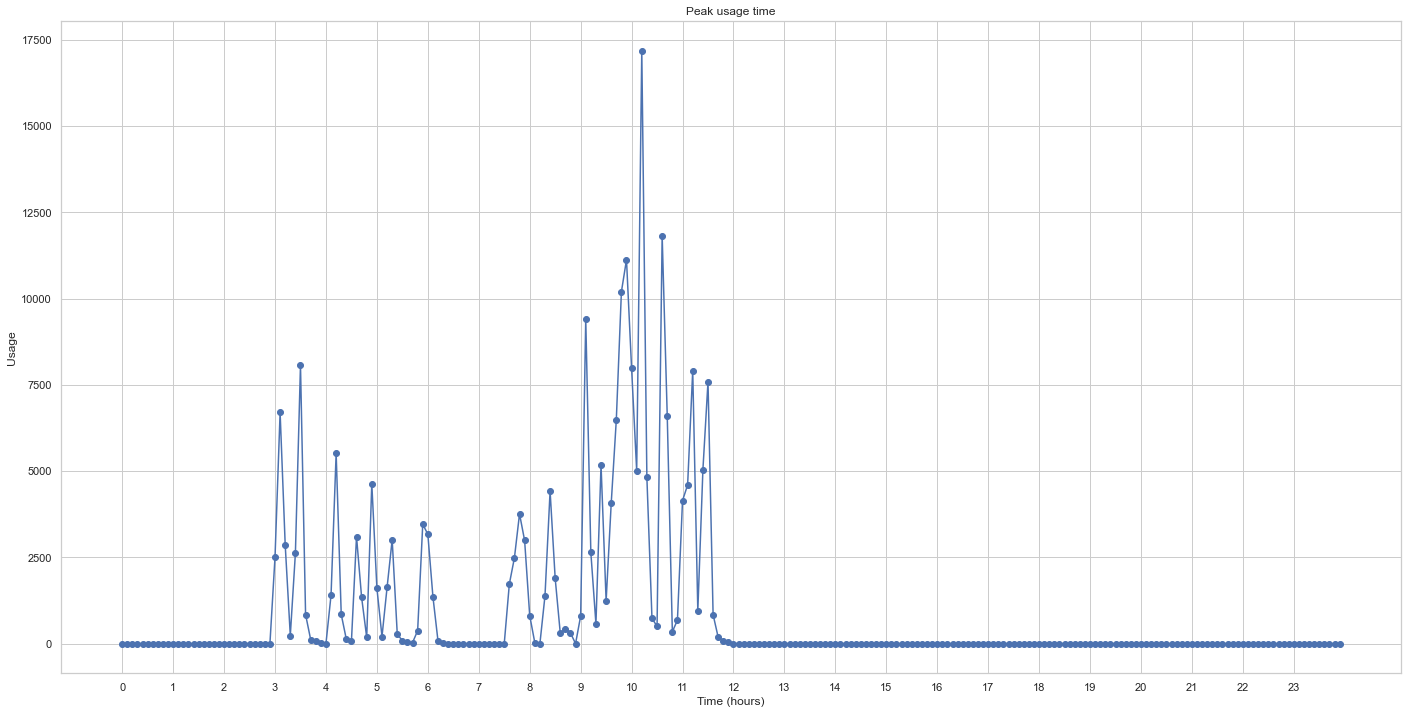

In [41]:
# Create an array representing the 24-hour timeline
timeline = np.arange(0, 24, 0.1)

# Calculate busyness for each time point on the timeline
busyness = []
for hour in timeline:
    active_uses = ((df_cleaned['Hour'] <= hour+0.1) & (df_cleaned['Hour'] >= hour)).sum()
    busyness.append(active_uses)

plt.figure(figsize=(24, 12))
plt.plot(timeline, busyness, marker='o', linestyle='-', color='b')
plt.xlabel('Time (hours)')
plt.ylabel('Usage')
plt.title('Peak usage time')
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))
plt.show()

Here we can see the usage frequency at each hour of the day. We can infer that peak usage is from 9am to 11am.

### Correlation

<AxesSubplot: >

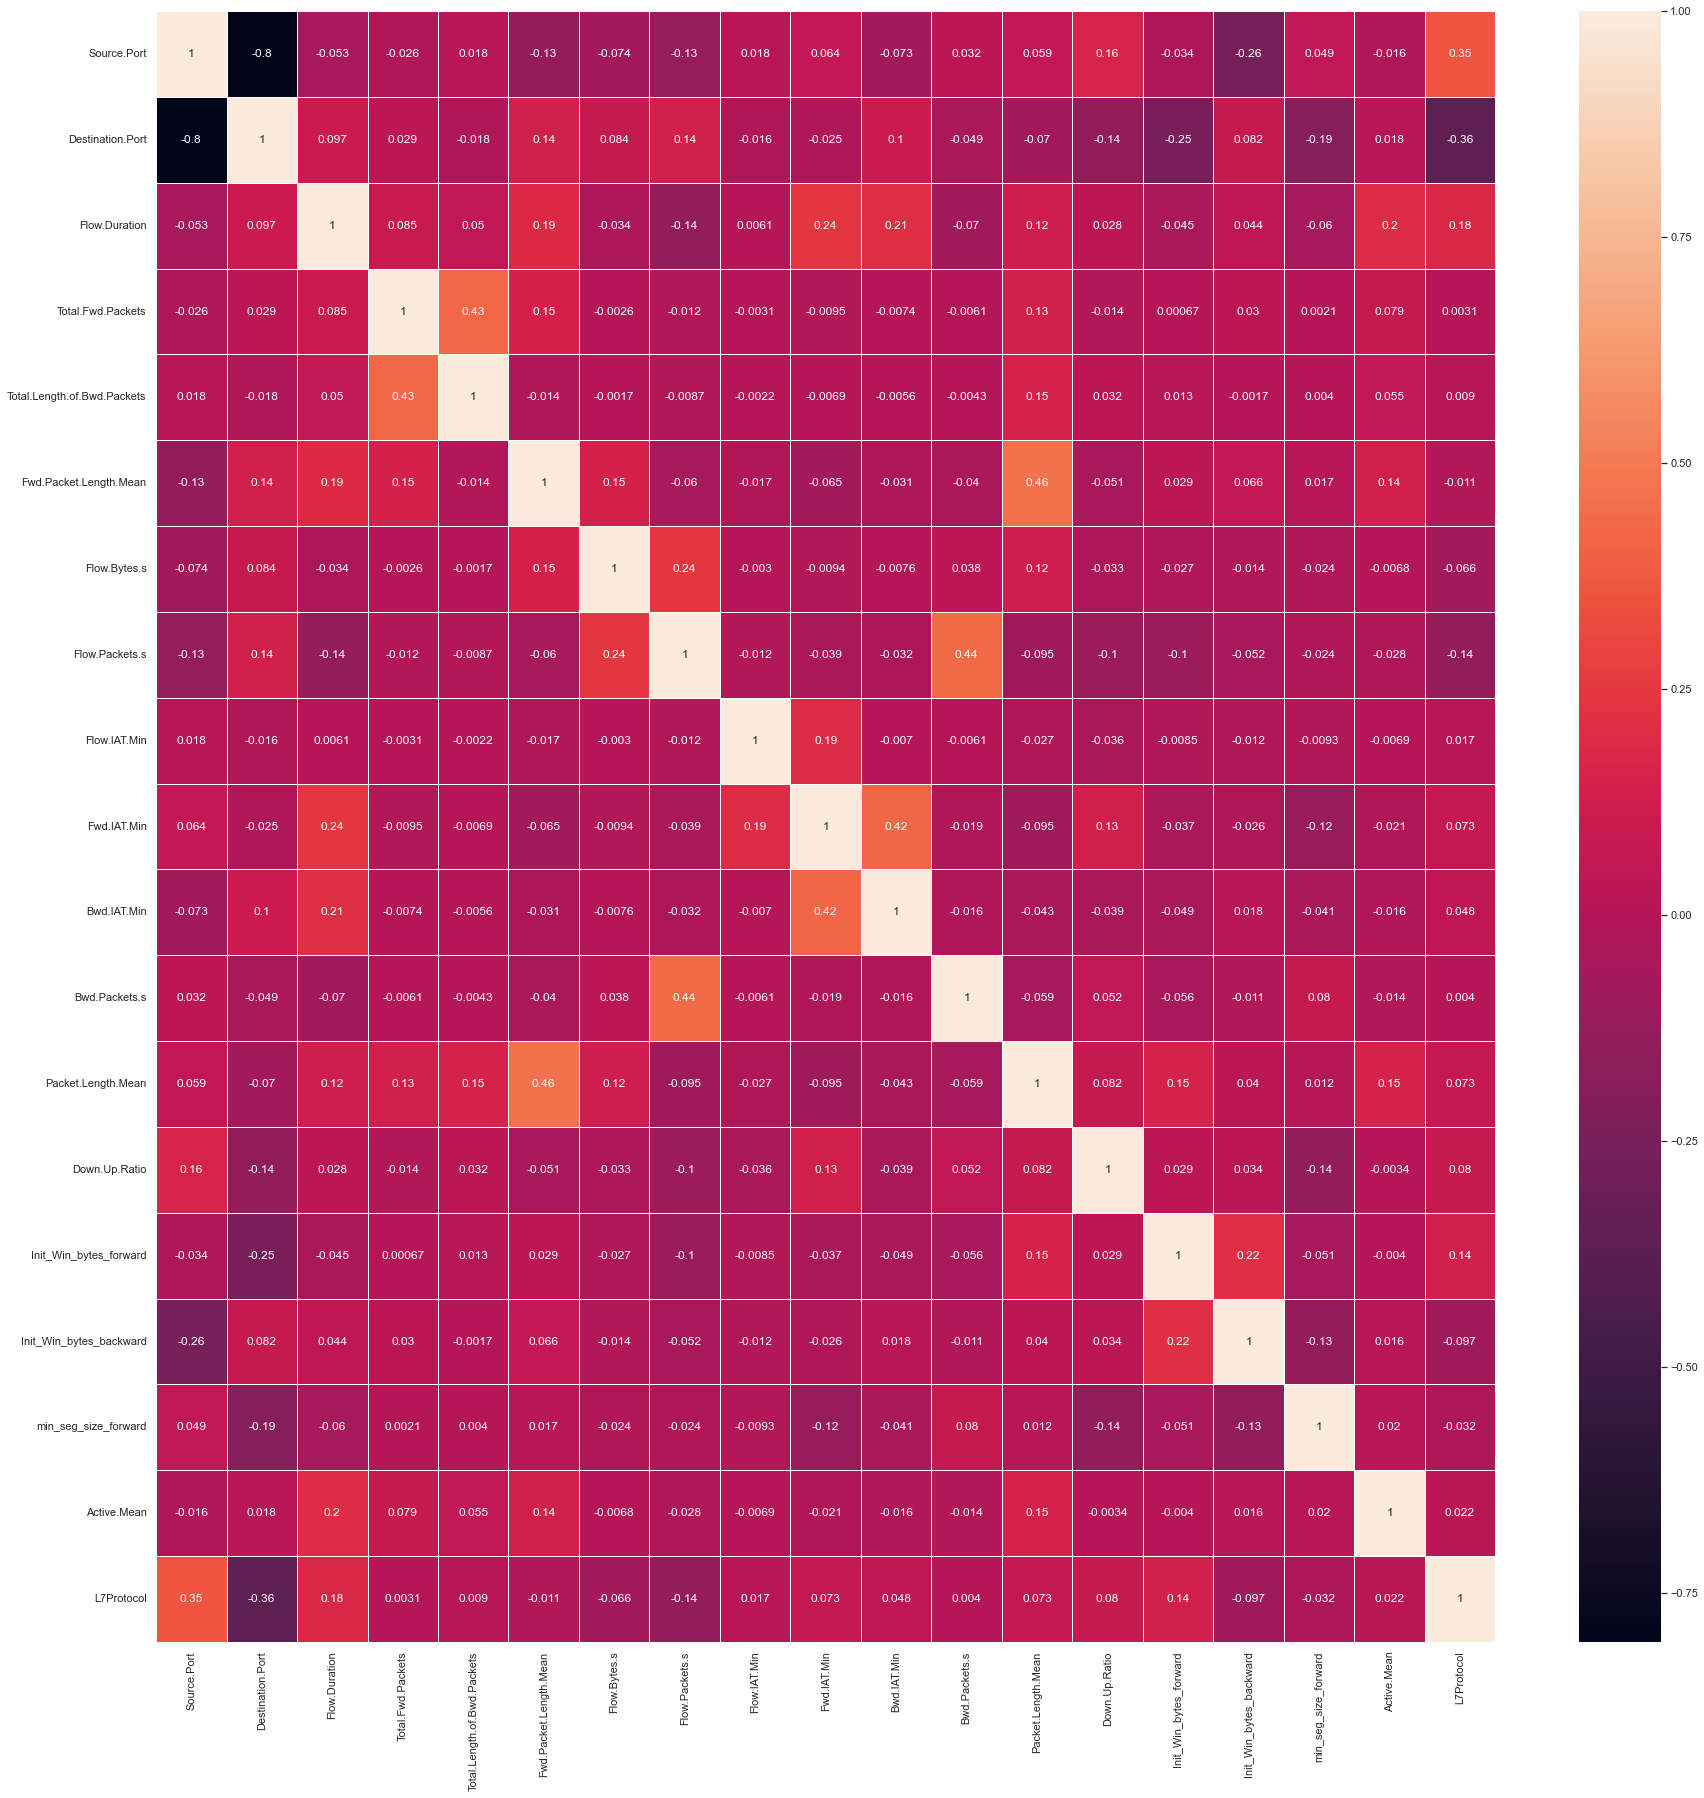

In [47]:
new_df = df[['Source.Port', 'Destination.Port', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol'
       ]]
plt.figure(figsize=(30,30))
sns.heatmap(data=new_df.corr(), lw = 1,annot=True)

In [48]:
# Graph of Protocol Name vs Frequency
freq_of_protocol = df_cleaned['ProtocolName'].value_counts()
# sns.histplot(freq_protocol.values())
application_name = []
frequency_count = []
for key, value in freq_of_protocol.items():
    application_name.append(key)
    frequency_count.append(value)
    
print("Number of Unique Application Names: ", len(freq_of_protocol))    

Number of Unique Application Names:  49


In [49]:
# Now filtering those which have more frequency in instances

requiredProtocolName = []
for key, value in freq_of_protocol.items():
    if (value >= 1000):
        requiredProtocolName.append(key)

print(requiredProtocolName)

['GOOGLE', 'HTTP', 'SSL', 'AMAZON', 'YOUTUBE', 'HTTP_CONNECT', 'HTTP_PROXY', 'CONTENT_FLASH', 'CLOUDFLARE', 'MICROSOFT', 'GMAIL', 'FACEBOOK', 'APPLE', 'MSN', 'TWITTER', 'WINDOWS_UPDATE', 'YAHOO', 'SKYPE']


In [50]:
# Create a dictionary with ProtocolName as keys and ProtocolName_encoded as values
protocol_dict = df_cleaned.set_index('L7Protocol')['ProtocolName'].to_dict()

In [51]:
protocol_dict

{7: 'HTTP',
 91: 'SSL',
 124: 'YOUTUBE',
 126: 'GOOGLE',
 40: 'CONTENT_FLASH',
 130: 'HTTP_CONNECT',
 131: 'HTTP_PROXY',
 119: 'FACEBOOK',
 70: 'YAHOO',
 120: 'TWITTER',
 178: 'AMAZON',
 147: 'WINDOWS_UPDATE',
 212: 'MICROSOFT',
 122: 'GMAIL',
 220: 'CLOUDFLARE',
 121: 'DROPBOX',
 64: 'SSL_NO_CERT',
 219: 'OFFICE_365',
 68: 'MSN',
 176: 'WIKIPEDIA',
 222: 'MQTT',
 142: 'WHATSAPP',
 169: 'UBUNTUONE',
 179: 'EBAY',
 221: 'MS_ONE_DRIVE',
 125: 'SKYPE',
 140: 'APPLE',
 123: 'GOOGLE_MAPS',
 145: 'APPLE_ITUNES',
 195: 'TWITCH',
 133: 'NETFLIX',
 211: 'INSTAGRAM',
 203: 'EASYTAXI',
 163: 'TOR',
 135: 'WAZE',
 153: 'UPNP',
 143: 'APPLE_ICLOUD',
 5: 'DNS',
 60: 'HTTP_DOWNLOAD',
 156: 'SPOTIFY',
 148: 'TEAMVIEWER',
 92: 'SSH',
 175: 'FTP_DATA',
 1: 'FTP_CONTROL',
 200: 'SIMET',
 134: 'LASTFM',
 180: 'CNN',
 37: 'BITTORRENT',
 191: 'TIMMEU'}

In [52]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName',
       'Source.IP_encoded', 'Destination.IP_encoded'],
      dtype='object')

In [53]:
df_cleaned.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active.Mean,L7Protocol,ProtocolName,Source.IP_encoded,Destination.IP_encoded,Timestamp1,Hour
23,10.200.7.9,3128,192.168.180.37,1978,6,26/04/201711:11:17,94,2,0,0,...,215,-1,32,0.0,7,HTTP,64,8124,2017-04-26 11:11:17,11.188056
152,10.200.7.217,53283,179.1.4.244,443,6,26/04/201711:11:18,15112,2,1,92,...,1181,269,32,0.0,91,SSL,57,6764,2017-04-26 11:11:18,11.188333
177,10.200.7.196,51900,107.178.247.57,443,6,26/04/201711:11:17,1468855,15,13,880,...,14600,370,32,0.0,91,SSL,55,1577,2017-04-26 11:11:17,11.188056
284,10.200.7.9,3128,192.168.180.37,1992,6,26/04/201711:11:19,135,2,0,0,...,215,-1,32,0.0,7,HTTP,64,8124,2017-04-26 11:11:19,11.188611
296,10.200.7.217,55854,179.1.4.204,443,6,26/04/201711:11:17,2372498,11,8,1466,...,14600,243,32,0.0,124,YOUTUBE,57,6749,2017-04-26 11:11:17,11.188056


In [54]:
df_cleaned.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName',
       'Source.IP_encoded', 'Destination.IP_encoded', 'Timestamp1', 'Hour'],
      dtype='object')

In [55]:
final_features=[]

for i in df_cleaned.columns:
    final_features.append(i)

pos_value_columns=final_features

In [56]:
print(len(final_features))

for i in final_features:
    print(i + " ")

32
Source.IP 
Source.Port 
Destination.IP 
Destination.Port 
Protocol 
Timestamp 
Flow.Duration 
Total.Fwd.Packets 
Total.Backward.Packets 
Total.Length.of.Fwd.Packets 
Total.Length.of.Bwd.Packets 
Fwd.Packet.Length.Mean 
Bwd.Packet.Length.Min 
Flow.Bytes.s 
Flow.Packets.s 
Flow.IAT.Min 
Fwd.IAT.Min 
Bwd.IAT.Min 
Bwd.Packets.s 
Min.Packet.Length 
Packet.Length.Mean 
Down.Up.Ratio 
Init_Win_bytes_forward 
Init_Win_bytes_backward 
min_seg_size_forward 
Active.Mean 
L7Protocol 
ProtocolName 
Source.IP_encoded 
Destination.IP_encoded 
Timestamp1 
Hour 


In [57]:
selected_columns = ['Source.Port', 'Destination.Port',
       'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean',
       'Source.IP_encoded', 'Destination.IP_encoded', 'Timestamp1', 'Hour']

df_selected = df_cleaned[selected_columns]

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Separate numerical and non-numeric columns
numerical_columns = df_selected.select_dtypes(include=[np.number]).columns
non_numeric_columns = [col for col in df_cleaned.columns if col not in numerical_columns]

# final data that will be using for predicting the Protocol Name
data_for_prediction_feature_selection = df_cleaned[numerical_columns]
target_column = df_cleaned['L7Protocol']

#splitting data for feature selection via correlation matrix
feature_train,feature_test,target_train,target_test = train_test_split(data_for_prediction_feature_selection,target_column,test_size=0.2)

sc = StandardScaler()
# print(feature_train.head())
feature_train = sc.fit_transform(feature_train)
feature_test = sc.transform(feature_test)

data_for_prediction_feature_selection

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Mean,Bwd.Packet.Length.Min,...,Bwd.Packets.s,Min.Packet.Length,Packet.Length.Mean,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active.Mean,Source.IP_encoded,Destination.IP_encoded,Hour
23,3128,1978,6,94,2,0,0,0.0,0.000000,0,...,0.000000,0,0.000000,215,-1,32,0.0,64,8124,11.188056
152,53283,443,6,15112,2,1,92,0.0,46.000000,0,...,66.172578,0,34.500000,1181,269,32,0.0,57,6764,11.188333
177,51900,443,6,1468855,15,13,880,467.0,58.666667,0,...,8.850431,0,46.448276,14600,370,32,0.0,55,1577,11.188056
284,3128,1992,6,135,2,0,0,0.0,0.000000,0,...,0.000000,0,0.000000,215,-1,32,0.0,64,8124,11.188611
296,55854,443,6,2372498,11,8,1466,302.0,133.272727,0,...,3.371973,0,88.400000,14600,243,32,0.0,57,6749,11.188056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574710,3970,3128,6,2287,5,0,0,0.0,0.000000,0,...,0.000000,0,0.000000,32768,-1,32,0.0,2528,64,5.575278
3575671,49657,3128,6,346,1,2,0,0.0,0.000000,0,...,5780.346821,0,0.000000,4096,606,32,0.0,3200,65,5.571111
3575684,63405,3128,6,26981272,3,0,84,0.0,28.000000,0,...,0.000000,0,31.500000,4096,-1,32,0.0,3200,66,5.763611
3575688,49471,3128,6,2055,3,0,0,0.0,0.000000,0,...,0.000000,0,0.000000,4096,-1,32,0.0,3200,65,5.771111


In [60]:
# standardizing the dataset and spliting the original data
feature_train_std, feature_test_std, target_train_std, target_test_std = train_test_split(x_dataset, y_dataset, test_size=0.2)

sc = StandardScaler()
feature_train_std = sc.fit_transform(feature_train_std)
feature_test_std = sc.transform(feature_test_std)

In [61]:
final_result = {'Random Forest': {'Feature Selection': 0}, 'Logistic Regression': {'Feature Selection': 0},'Decision Tree': {'Feature Selection': 0,}}
f1Scores = {'Random Forest': {'Feature Selection': 0}, 'Logistic Regression': {'Feature Selection': 0},'Decision Tree': {'Feature Selection': 0,}}
numberOfFeatures = {'Random Forest': {'Feature Selection': 0}, 'Logistic Regression': {'Feature Selection': 0},'Decision Tree': {'Feature Selection': 0,}}

# ML Models

## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
def random_forest_classifier(feature_train, target_train):
    randomForest = RandomForestClassifier(n_estimators=200)
    randomForest.fit(feature_train, target_train)
    
    return randomForest

## Feature Selection

In [63]:
print(feature_train.shape)
print(target_train.shape)
print(feature_test.shape)
print(target_test.shape)

(172486, 25)
(172486,)
(43122, 25)
(43122,)


In [64]:
# random forest on feature selection via correlation matrix data
# feature_test.shape
from sklearn.metrics import f1_score

randomForest = random_forest_classifier(feature_train, target_train)
predictions = randomForest.predict(feature_test)
print('Accuracy with Random Forest on Feature Selection via Correlaion Matrix', randomForest.score(feature_test, target_test))

final_result['Random Forest']['Feature Selection'] = randomForest.score(feature_test, target_test)
f1Scores['Random Forest']['Feature Selection'] = f1_score(target_test, predictions, average='micro')
numberOfFeatures['Random Forest']['Feature Selection'] = feature_train.shape[1]

Accuracy with Random Forest on Feature Selection via Correlaion Matrix 0.8959463846760354


### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(feature_train, target_train):
    classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=100)
    classifier.fit(feature_train, target_train)
    
    return classifier

#### Feature Selection

In [66]:
# logistic regression on feature selction via correlation matrix data
logisticRegressionFeatureSelection = logistic_regression(feature_train, target_train)
target_pred = logisticRegressionFeatureSelection.predict(feature_test)

print('Accuracy in Logistic Regression on Feature Selection via Correlation Matrix', logisticRegressionFeatureSelection.score(feature_test, target_test))

final_result['Logistic Regression']['Feature Selection'] = logisticRegressionFeatureSelection.score(feature_test, target_test)
f1Scores['Logistic Regression']['Feature Selection'] = f1_score(target_test, predictions, average='micro')
numberOfFeatures['Logistic Regression']['Feature Selection'] = feature_train.shape[1]

Accuracy in Logistic Regression on Feature Selection via Correlation Matrix 0.5316079959185567


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

#### Feature Selection

In [67]:
from sklearn.tree import DecisionTreeClassifier

# decistion tree on feature selection

decisionTreeNormal = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
decisionTreeNormal.fit(feature_train, target_train)
target_pred = decisionTreeNormal.predict(feature_test)
accuracy = decisionTreeNormal.score(feature_test, target_test)
print("Accuracy in Decision Tree on Normal:", accuracy)
final_result['Decision Tree']['Feature Selection'] = accuracy
f1Scores['Decision Tree']['Feature Selection'] = f1_score(target_test, predictions, average='micro')
numberOfFeatures['Decision Tree']['Feature Selection'] = feature_train.shape[1]

Accuracy in Decision Tree on Normal: 0.6663188163814294


In [68]:
accuracy_df = pd.DataFrame(final_result)
print("Accuracy for each model for particular algorithm")
accuracy_df

Accuracy for each model for particular algorithm


,Random Forest,Logistic Regression,Decision Tree
Feature Selection,0.895946,0.531608,0.666319
